In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve

In [9]:
g_Ca = 1.1  #mS/cm^2
g_L = 0.5   #mS/cm^2
g_K = 2     #mS/cm^2
E_Ca = 100  #mV
E_L = -50   #mV
E_K = -70   #mV
J = 15  #uA/cm^2

In [10]:
def m_inf(Vm):
    return 0.5 * (1 + np.tanh( (Vm+1)/15 ))

def n_inf(Vm):
    return 0.5 * (1 + np.tanh( (Vm-10)/14.5 ))

def nulclinas(Vm):
    nulclina_Vm = ( J - g_Ca * m_inf(Vm) * (Vm - E_Ca) - g_L * (Vm - E_L) ) / ( g_K*(Vm - E_K) )
    nulclina_n = n_inf(Vm)
    return nulclina_Vm, nulclina_n

In [11]:
Vm = np.arange(-40,40,0.1)
n1, n2 = nulclinas(Vm)

In [12]:
def equacoes_diferenca(Vm):
    nulclina_Vm = (J - g_Ca * m_inf(Vm) * (Vm - E_Ca) - g_L * (Vm - E_L)) / (g_K * (Vm - E_K))
    nulclina_n = n_inf(Vm)
    return nulclina_Vm - nulclina_n


Vm_equilibrio = fsolve(equacoes_diferenca, x0=0.0)
n_equilibrio = n_inf(Vm_equilibrio)

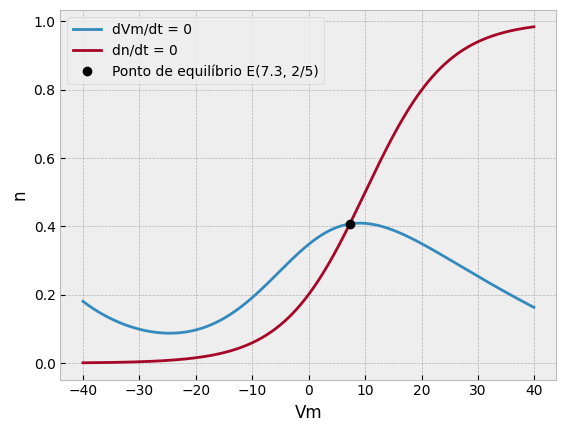

In [13]:
plt.style.use('bmh')

plt.figure()
plt.plot(Vm, n1, label="dVm/dt = 0")
plt.plot(Vm, n2, label="dn/dt = 0")
plt.plot(Vm_equilibrio, n_equilibrio, 'ko', label='Ponto de equilíbrio E(7.3, 2/5)')
plt.legend()

plt.xlabel('Vm')
plt.ylabel('n')

plt.show()